In [16]:
# Tesseract OCRの関連ライブラリーとPythonラッパーをインストール
# Tesseractは、OSによってインストール方法が違うため、notebook作成者はColaboratory上で実行
!apt update -y
!apt install -y tesseract-ocr libtesseract-dev
!pip install pyocr

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 3s (83.3 kB/s)
Reading package lists... Done
Building dependency tree       
Reading 

In [17]:
#日本語トレーニングデータのダウンロードとインストール
!curl -L https://github.com/tesseract-ocr/tessdata/raw/master/jpn.traineddata > jpn.traineddata
!cp jpn.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    668      0 --:--:-- --:--:-- --:--:--   671
100 34.0M  100 34.0M    0     0  30.1M      0  0:00:01  0:00:01 --:--:-- 39.1M


In [0]:
# モジュールをインポート
from PIL import Image
import sys
import pyocr
import pyocr.builders

In [19]:
# OCRが使用可能かをチェック
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR tool is not found")
    sys.exit(1)

# OCRツール名を表示
tool = tools[0]
print("OCR tool is '%s'" % (tool.get_name()))

OCR tool is 'Tesseract (sh)'


In [20]:
# OCR対応言語を表示
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]
print("Will use lang '%s'" % (lang))

Available languages: jpn, osd, eng
Will use lang 'jpn'


In [21]:
# OCRを行う画像を読み込み
from google.colab import files
f = files.upload()

# 読み込んだ画像のファイル名
filename = list(f)[0]

Saving IMG_1060.jpg to IMG_1060 (1).jpg


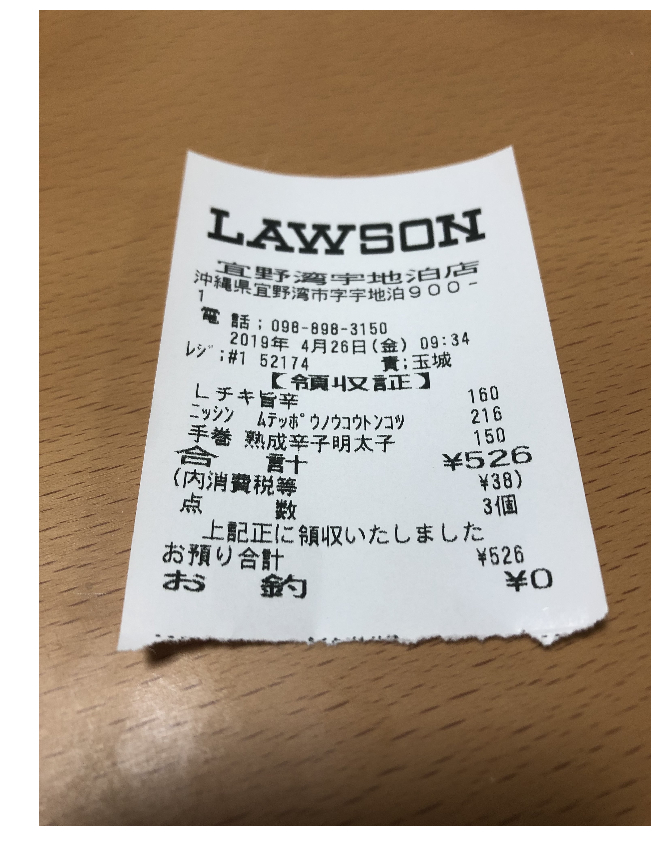

In [22]:
# 読み込んだ画像を表示してみる
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(img)
plt.show()

In [24]:
# 読み込んだ画像を英語で、OCRでテキスト抽出してみる。
txt = tool.image_to_string(
    Image.open(filename),
    lang='eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print(txt)

PM aes eee IESE OO
. 2a gee, 898-31 ee) 09: 34
a 426
=. htt 2/9001" a8
we MASE FARAH
ie) at ¥526
CALS Baba ae 438)
a 3H 3(a
CARIES SRuRuvie LUT
PHU Set 4526
-— +5 GF ¥O


???????

In [25]:
# 読み込んだ画像を日本語で、OCRでテキスト抽出してみる。
txt = tool.image_to_string(
    Image.open(filename),
    lang='jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print(txt)

a 津 約 書 子 aas ヨ ー ュ t セ ビ 戸 三
① 楊 県 客 野 違 帆 字 子 巡 迫 ⑨ 0 O -
継 篁言]〕g聖8~898-3ー是塁) n e
め 、 ④ 月 ②⑥ ⑥
⑳ ia ⑤②①⑦④ ` 貫 i 玉 城
ト 声キ膏〔辛=又言正] c
羹ン 韓蔑ホ〝 り ノ ウ コ ウ リ ト ② コ ⑨ 葺蒼這
字 響 熟 成 辛 子 明 太 子
| †子 ⑧ \ ら ン ら ロ ら
( 内 消 費 税 箔 t③⑥
′ 惧 数 ③ 慣
、 一 記 正 に 領 収 い た し ま し た
お 預 り 合 計 Y⑤②⑥
闘 ヨ ミ ュ ~ 金 \0
談 ー ョ
憂二 談 ー ン ョ
ー 浩 詞 ②


In [27]:
# 読み込んだ画像を日本語で、OCRでテキスト抽出と位置の抽出（単語）をしてみる。
word_boxes = tool.image_to_string(
    Image.open(filename),
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)

for box in word_boxes:
    print('word: {}, pos: {}'.format(box.content, box.position))

word: `, pos: ((1086, 1530), (1099, 1580))
word: 0⑨⑧-⑧⑨⑧-③①⑤U, pos: ((1151, 1529), (1718, 1606))
word: >, pos: ((783, 1649), (858, 1681))
word: .②0①⑨, pos: ((899, 1588), (1133, 1694))
word: 年, pos: ((1146, 1613), (1235, 1688))
word: ④, pos: ((1298, 1629), (1330, 1690))
word: 月, pos: ((1445, 1633), (1478, 1694))
word: ②⑥, pos: ((1494, 1633), (1527, 1694))
word: 日, pos: ((0, 0), (3024, 4032))
word: (, pos: ((1648, 1621), (1773, 1696))
word: 金, pos: ((1790, 1619), (1813, 1690))
word: ), pos: ((0, 0), (3024, 4032))
word: 0⑨:③④, pos: ((1885, 1591), (2127, 1677))
word: :, pos: ((897, 1712), (910, 1734))
word: が, pos: ((936, 1676), (981, 1750))
word: ①, pos: ((995, 1687), (1016, 1752))
word: 5召‥月, pos: ((1094, 1626), (1417, 1874))
word: 日, pos: ((1550, 1632), (1614, 1702))
word: 貴, pos: ((1690, 1709), (1781, 1789))
word: :, pos: ((1803, 1722), (1817, 1776))
word: 玩, pos: ((1843, 1694), (1972, 1874))
word: 基, pos: ((1964, 1688), (2038, 1771))
word: 〝, pos: ((881, 1866), (884, 1868))
word: 代, p

In [28]:
# 読み込んだ画像を日本語で、OCRでテキスト抽出と位置の抽出（行）をしてみる。
word_boxes = tool.image_to_string(
    Image.open(filename),
    lang='jpn',
    builder=pyocr.builders.LineBoxBuilder(tesseract_layout=6)
)

for box in word_boxes:
    print('word: {}, pos: {}'.format(box.content, box.position))

word: ` 0⑨⑧-⑧⑨⑧-③①⑤U, pos: ((1086, 1529), (1718, 1606))
word: > .②0①⑨ 年 ④ 月 ②⑥ 日 ( 金 ) 0⑨:③④, pos: ((783, 1588), (2127, 1696))
word: : が ① 5召‥月 日 貴 : 玩 基, pos: ((897, 1626), (2038, 1874))
word: 〝 代 画 月 又 言 E, pos: ((881, 1797), (1842, 1883))
word: ピ デ ィ s 月 又 言, pos: ((757, 1803), (1720, 1999))
word: ー メ ノ ④ が ⑦ ッ ポ り ノ ウ コ ウ ト ソ コ ⑨, pos: ((746, 1973), (1803, 2105))
word: 詞 熟 成 辛 子 明 太 子, pos: ((879, 2075), (1758, 2232))
word: M, pos: ((2148, 2075), (2179, 2152))
word: \ ら ご ロ, pos: ((1991, 2152), (2436, 2278))
word: 唇 v③⑥, pos: ((1183, 2269), (2385, 2376))
word: e 00, pos: ((805, 2393), (2365, 2635))
word: 正 に 頚 収 い た し ま し た, pos: ((1046, 2533), (2198, 2640))
word: お 頓 り 合 討 ・ v⑤②⑥, pos: ((610, 2543), (2395, 2773))
word: ホ ミ 鉄 \ ロ, pos: ((611, 2757), (2538, 2910))
word: な cem, pos: ((1146, 2200), (1191, 2213))
word: , pos: ((0, 668), (2814, 3778))
